In [1]:
import gempyor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
import xarray as xr

folder = 'datasets/Flu_SMH_R1_lowVac_optImm_2022/'
col2keep = ['incidI_FluA', 'incidI_FluB']

In [2]:
maxfiles = -1
hosp_files = list(Path(str(folder)).rglob('*.parquet'))[:maxfiles]

df = gempyor.read_df(str(hosp_files[0]))
full_df = df[['date', 'geoid']]
indexes = df[['date', 'geoid']] # indexes


full_array = -1 * np.ones((len(hosp_files), 
                           len(col2keep),
                           len(full_df.date.unique()),
                           len(full_df.geoid.unique())
                          ))


for i, path_str in enumerate(hosp_files):
    df = gempyor.read_df(str(path_str))
    data = df[col2keep]
    for k, c in enumerate(col2keep):
        full_array[i, k] = pd.concat([data[c], indexes], axis=1).pivot(values=c, index='date', columns='geoid').to_numpy()
        

    data.columns = [n+f'_{i}' for n in col2keep]   
    full_df = pd.concat([full_df, data], axis=1)
    

print((full_array<0).sum(), ' errors')

0  errors


In [3]:
geoids = list(pd.concat([data[c+f'_{i}'], indexes], axis=1).pivot(values=c+f'_{i}', index='date', columns='geoid').columns)
dates = list(pd.concat([data[c+f'_{i}'], indexes], axis=1).pivot(values=c+f'_{i}', index='date', columns='geoid').index)

## Add in covariates

In [4]:
humid = pd.read_csv('datasets/Flu_SMH_R1_lowVac_optImm_2022/r0s_ts_2022.csv', index_col='date')
humid

,02000,01000,05000,04000,06000,08000,09000,11000,10000,12000,...,46000,47000,48000,49000,51000,50000,53000,55000,54000,56000
date,,,,,,,,,,,,,,,,,,,,,
2022-07-17,1.303787,0.882871,0.890884,1.148288,1.056375,1.160712,1.060517,0.927333,0.968584,0.875022,...,1.028111,0.921551,0.892532,1.354977,0.913437,1.107889,1.245885,1.043337,0.930163,1.203723
2022-07-18,1.302452,0.883090,0.891127,1.137085,1.055415,1.160745,1.059577,0.926784,0.967958,0.875208,...,1.028268,0.921613,0.893227,1.354061,0.913100,1.106805,1.244459,1.043746,0.929868,1.203922
2022-07-19,1.301294,0.883300,0.891368,1.126499,1.054464,1.160946,1.058708,0.926288,0.967390,0.875359,...,1.028338,0.921704,0.893871,1.353330,0.912792,1.105822,1.243128,1.044140,0.929619,1.204321
2022-07-20,1.300315,0.883495,0.891602,1.116564,1.053521,1.161316,1.057905,0.925840,0.966875,0.875468,...,1.028304,0.921819,0.894459,1.352788,0.912509,1.104933,1.241893,1.044508,0.929411,1.204920
2022-07-21,1.299514,0.883669,0.891823,1.107312,1.052582,1.161854,1.057165,0.925436,0.966408,0.875529,...,1.028150,0.921952,0.894984,1.352441,0.912245,1.104134,1.240757,1.044836,0.929240,1.205721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,1.500544,0.930216,0.946403,1.732154,1.129664,1.296823,1.211717,1.051433,1.098560,0.902458,...,1.132217,1.005447,0.897080,1.488607,1.013823,1.285346,1.362474,1.159561,1.040436,1.353630
2023-06-07,1.492299,0.926310,0.942017,1.722510,1.126417,1.290190,1.204049,1.044637,1.091569,0.899539,...,1.123032,0.999946,0.894594,1.484178,1.007892,1.276596,1.358549,1.150380,1.034028,1.346293
2023-06-08,1.484210,0.922585,0.937829,1.712321,1.123255,1.283712,1.196611,1.038065,1.084803,0.896777,...,1.114294,0.994657,0.892280,1.479756,1.002175,1.268093,1.354659,1.141604,1.027843,1.339122


In [5]:
humid_st = np.dstack([humid.to_numpy()]*len(hosp_files))
#humid_st = humid_st[:, np.newaxis, :]
print(humid_st.shape)
humid_xarr = xr.DataArray(humid_st, 
                          coords={
                                  #'feature': ['R0Humidity'],
                                  'date': dates,
                                  'place': geoids,
                                  'sample': np.arange(len(hosp_files)),}, 
                          dims=[ "date", "place", "sample"]) #"feature",
humid_xarr = humid_xarr.expand_dims({"feature":['R0Humidity']})

(329, 51, 299)


In [6]:
full_xarr = xr.DataArray(full_array, 
coords={'sample': np.arange(len(hosp_files)),'feature': col2keep, 'date': dates, 'place': geoids}, 
dims=["sample", "feature", "date", "place"])

In [7]:
full_xarr = xr.concat([full_xarr, humid_xarr], dim='feature')

In [8]:
full_xarr

<xarray.DataArray (sample: 299, feature: 3, date: 329, place: 51)>
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [4.40235557e+01, 1.51285917e-02, 1.23085892e+02, ...,
          4.10030592e-02, 4.25304620e-02, 1.95743834e-02],
         [4.40235557e+01, 1.51285917e-02, 1.23085892e+02, ...,
          4.10030592e-02, 4.25304620e-02, 1.95743834e-02],
         [3.59821694e+01, 1.26730389e-02, 1.06635309e+02, ...,
          3.08718720e-02, 3.40318745e-02, 1.62709476e-02]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
         [0.00000000e+00, 6.79765973e-10, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 6.79765973e-10, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 6.81271786e-10, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[1.30378725e+00, 8.82870631e-01, 8.90884236e-01, ...,
          1.04333688e+00, 9.30162706e-01, 1.20372294e+00],
         [1.30245173e+00, 8.83089799e-01, 8.91126779e-01, ...,
          1.04374563e+00, 9.29867644e-01, 1.20392176e+00],
         [1.30129419e+00, 8.83299611e-01, 8.91367965e-01, ...,
          1.04414015e+00, 9.29618984e-01, 1.20432076e+00],
         ...,
         [1.48421021e+00, 9.22584642e-01, 9.37829299e-01, ...,
          1.14160376e+00, 1.02784311e+00, 1.33912203e+00],
         [1.47628117e+00, 9.19045621e-01, 9.33845016e-01, ...,
          1.13325104e+00, 1.02188822e+00, 1.33212121e+00],
         [1.46851765e+00, 9.15699401e-01, 9.30070234e-01, ...,
          1.12533902e+00, 1.01617045e+00, 1.32529617e+00]]]])
Coordinates:
  * sample   (sample) int64 0 1 2 3 4 5 6 7 ... 291 292 293 294 295 296 297 298
  * feature  (feature) object 'incidI_FluA' 'incidI_FluB' 'R0Humidity'
  * date     (date) datetime64[ns] 2022-07-17 2022-07-18 ... 2023-06-10
  * place    (place) <U5 '01000' '02000' '04000' ... '54000' '55000' '56000'

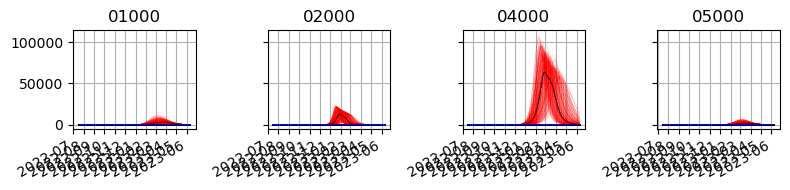

In [9]:
grid = (1,4)
fig, axes = plt.subplots(grid[0], grid[1], sharex=True, sharey=True, figsize=(grid[1]*2,grid[0]*2))
for i, ax in enumerate(axes.flat):
    c = ['red', 'green', 'blue']
    place = full_xarr.get_index('place')[i]
    tp = full_xarr.sel(place=place)
    for k, val in enumerate(full_xarr.feature):
        ax.plot(tp.date, tp.sel(feature=val).T, c = c[k], lw = .1, alpha=.5)
        ax.plot(tp.date, tp.sel(feature=val).T.median(axis=1), 
                c = 'k',#'dark'+c[k], 
                lw = .5, 
                alpha=1)
    ax.grid()
    ax.set_title(place)
fig.autofmt_xdate()
fig.tight_layout()

In [15]:
full_xarr_w = full_xarr.resample(date="W").sum()
full_xarr_w.to_netcdf('datasets/from_csp_weekly.nc')
full_xarr_w

<xarray.DataArray (sample: 299, feature: 3, date: 48, place: 51)>
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.27717850e+03, 3.89409153e-01, 2.21789825e+03, ...,
          2.31500372e+00, 1.88922857e+00, 5.49804837e-01],
         [6.54042964e+02, 2.07761558e-01, 1.42418603e+03, ...,
          8.57298486e-01, 7.46238886e-01, 2.79332337e-01],
         [2.97221198e+02, 1.00615659e-01, 7.97274864e+02, ...,
          2.94246800e-01, 2.93787574e-01, 1.30951553e-01]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
         [0.00000000e+00, 6.16149669e-09, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 5.66474510e-09, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 4.18273229e-09, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[1.30378725e+00, 8.82870631e-01, 8.90884236e-01, ...,
          1.04333688e+00, 9.30162706e-01, 1.20372294e+00],
         [9.09910104e+00, 6.18535962e+00, 6.24254537e+00, ...,
          7.31322076e+00, 6.50514550e+00, 8.44286606e+00],
         [9.09522734e+00, 6.19022749e+00, 6.25138528e+00, ...,
          7.32243452e+00, 6.50398711e+00, 8.52098397e+00],
         ...,
         [1.12684686e+01, 6.92289748e+00, 7.08810851e+00, ...,
          9.06771165e+00, 7.92671422e+00, 1.01696083e+01],
         [1.08090216e+01, 6.66751532e+00, 6.79995176e+00, ...,
          8.48082883e+00, 7.53150989e+00, 9.75008275e+00],
         [8.93078917e+00, 5.54814990e+00, 5.64114587e+00, ...,
          6.87926662e+00, 6.18742508e+00, 8.05758845e+00]]]])
Coordinates:
  * sample   (sample) int64 0 1 2 3 4 5 6 7 ... 291 292 293 294 295 296 297 298
  * feature  (feature) object 'incidI_FluA' 'incidI_FluB' 'R0Humidity'
  * place    (place) <U5 '01000' '02000' '04000' ... '54000' '55000' '56000'
  * date     (date) datetime64[ns] 2022-07-17 2022-07-24 ... 2023-06-11

In [25]:
full_xarr_w_padded = full_xarr_w.pad({'date': (0, 16), 'place':(0,13)}, mode='constant', constant_values=0)
full_xarr_w_padded.to_netcdf('datasets/from_csp_weekly_pad.nc')

### Dengue Trial

In [12]:
def yw2date(row):
    year = int(row["year"])
    week = int(row["week"])
    date = "{}-{}-1".format(year, week)
    return datetime.strptime(date, "%Y-%W-%w")
df = pd.read_csv('dengue-thailand-province-week.csv')
df['year'] = df['date_sick_year']
df = df.drop('date_sick_year', axis=1)
df['date'] = df.apply(yw2date, axis=1)

## Cannot pivot there are duplicated entries:
df1 = df.set_index(['year', 'week', 'province'])
duplicated = np.where(df1.index.duplicated())
print(len(duplicated[0]), "duplicated index entries...")
print(duplicated[0])
print(df1.iloc[116065])
print(df1.loc[1999, 1, 10])

# pivot_table with aggregrate as mean
df = df.pivot_table(index='date', columns='province', values='cases', aggfunc='mean') # perhaps should be sum
fig, axes = plt.subplots(11, 7, sharex=True, sharey=True, figsize=(10,10))
for i, prov in enumerate(df.columns):
    ax = axes.flat[i]
    ax.plot(df[prov])
    ax.grid()
    ax.set_title(prov)
fig.autofmt_xdate()
fig.tight_layout()

FileNotFoundError: [Errno 2] No such file or directory: 'dengue-thailand-province-week.csv'